# Innovation Portfolio Optimization

## Motivation

Innovation Portfolio Optimization is an extremely difficult problem to solve.

Traditionally, “optimization” of a portfolio is a very manual and time-consuming process, with a lot of room for sub-optimal results leading to waste and delays in projects and processes.


## Problem description

There are an astronomical number of combinations to select and schedule projects optimally within the scarce and limited resources available. In addition, there are several conflicting business objectives to be considered when creating a portfolio, consequently there is a need to optimize the trade-offs between these conflicting objectives. 


## Model formulation

Mathematical programming is a declarative approach where the modeler formulates a mathematical optimization problem that captures the key features of a complex decision problem. The Gurobi optimizer solves the mathematical optimization problem using state of the art mathematics and computer science.

A mathematical optimization model has five components.
* Sets
* Parameters
* Decision variables
* Constraints
* Objective function(s)

### Sets and indices

The goal of this model is to optimize the selection and scheduling of in portfolio from a set of projects $p \in P$, such that the benefit of the selected projects is optimized while satisfying a pluraity of constraints. Each of this projects is defined by the benefit $v_p$ that the project generates if selected, cost $c_p$ of selecting each project and its duration $d_p$. Additionally each project has a release period $\lambda_p$ which indicates the earliest period in which a project can start, and a due period $\delta_p$ which tells the maximum period in which the project can be completed. Extra information is required as input such as the budget $\beta$ to execute the projects, a penalty value $BigM$ for every unit of extra budget required if needed, a set $T$ of periods in the planning horizon, a set $IN \subseteq P$ containing the projects that the model will select and a set $OUT \subseteq P$ containing the projects that will be ignored by the project.

As mentioned above, the goal is to maximize the benefit, however in this model a parameter $\alpha$ is used to generate a decreasing function over time, e.g. a dollar in period $t = 1$ has a larger value than a dollar in period $t = 2$.


### Sets

$p \in P$: index and set of projects.

$t \in T$: periods and set of periods (planning horizon).

$IN \subseteq P$: set of projects forced to be selected.

$OUT \subseteq P$: set of projects forced to be not selected.

### Parameters 

$\alpha$: a discount factor.

$BigM$: Large penalty number for exceding one unit of budget

$\beta$: budget to fund the recommended projects.

$\lambda_p$: release date of project $p \in P$

$\delta_p$: due date of project $p \in P$

$v_p$: value or benefit of project $p \in P$

$c_p$: cost of project $p \in P$

$d_p$: duration of project $p \in P$

${P_p}^{CS}$: customer satisfaction of project $p \in P$


### Computed parameters

$[ES_p, LS_p]$: defines the earlies start and latest start time window of project $p \in P$. The release date $\lambda_p$ and due date $\delta_p$ will be used to obtain feasible time windows.

$[EF_p, LF_p]$: defines the earlies finish and latest finish time window of project $p \in P$. The release date $\lambda_p$, project duration $d_p$ and due date $\delta_p$ will be used to obtain feasible time windows.


### Decision variables

$y_p = 1$ if project $p$ is selected in the portfolio; and 0 otherwise.

$x_{p,t} = 1$ if project $p$ starts at time period $t$; and 0 otherwise.

$z_{p,t} = 1$ if project $p$ is completed at time period $t$; and 0 otherwise

$ArtBudget$: takes a positive value in case the recommended budget does not cover the cost of all the selected projects 

$$ MAX \; Benefit = \sum_{p \in P} \sum_{t = EF_p}^{LF_p}  \; \frac{v_p\;z_{p,t}}{(1 + \alpha)^t} - BigM \; ArtBudget$$

Subject to:

A project is selected $y_p = 1$ in case it is included in set $IN$
\begin{equation}
y_p = 1 \;\;\;\; \forall p \in IN
\label{eq:directSelected}
\end{equation}

A project is not selected $y_p = 0$ if the project is part of set $OUT$
\begin{equation}
y_p = 0 \;\;\;\; \forall p \in OUT
\label{eq:directExcluded}
\end{equation}

A constraint to ensure that a single start period variable $x_{p, t}$ is equal to one in case the project is selected $y_p = 1$
$$ \sum_{t = ES(p)}^{LS(p)} x_{p, t} = y_{p} \;\;\;\;\forall p \in P $$

If project $p$ is selected $y_p = 1$
$$\sum_{t = ES(p)}^{LS(p)} t \; x_{p, t} \geq \lambda_{p} \; y_{p} \;\;\;\; \forall p \in P$$

That it starts $x_{p, t}$ not earlier than period $\lambda_p$ 
$$\sum_{t = ES(p)}^{LS(p)} (t + d_{p}) \; x_{p, t} \leq \delta_{p} \; y_{p} \;\;\;\; \forall p \in P$$

That the project is completed at most at $\delta_p$ period
$$\sum_{t = EF(p)}^{LF(p)} t \; z_{p, t} = \sum_{t = ES(p)}^{LS(p)} (t + d_{p}) \; x_{p, t} \;\;\;\; \forall p \in P$$

Ensures that a single variable $z_{p, t} = 1$, in case the project is selected $y_p = 1$
$$\sum_{t = EF(p)}^{LF(p)} z_{p, t} = y_{p} \;\;\;\; \forall p \in P$$

Links start variables $x_{p, t}$ and $z_{p, t}$ and checks if the cost of the selected projects does not exceed the total budget $\beta$ if the projects contained in set $IN$ exceeds this budget, the artificial variable $ArtBudget$ takes a positive value to avoid infeasibilities and each unit of extra budget required is penalized by $BigM$ in the objective function.
$$\sum_{p \in P} c_{p} \; y_{p} \leq \beta + ArtBudget $$

The selection variables $y_p$,
$$y_p \in \{0,1\} \;\;\;\; \forall p \in P$$
The start variables $x_{p, t}$ and completion variables $z_{p, t}$
$$x_{p,t},\;z_{p,t} \in \{0,1\} \;\;\;\; \forall p \in P \;\; \forall t \in T$$
The artificial variable $ArtBudget$ to be larger or equal to zero
$$ArtBudtet \geq 0$$


# Script output and KPI's
When the optimization is completed, a simple report showing the list of selected projects and its start period is displayed. Also a variety of KPI's are computed to provide helpful information about the selected portfolio.

$Number\;of\;projects\;selected = \sum_{p \in P} y_p$: number of projects selected.

$Total\;cost = \sum_{p \in P} c_p \; y_p$: cost of selected projects.

$Total\;benefit = \sum_{p \in P} v_p \; y_p$: total benefit of selected projects.

$Cost\;by\;period$: this KPI assumes that the project cost $c_p$ is uniformly distributed during the project duration $d_p$.

$Benefit\;by\;period$: this KPI assumes that the project benefit $v_p$ occurs at project completion.

$Benefit\;performance = \frac{Total\;benefit}{\sum_{p \in P} v_p}$: ratio of selected benefit and possible benefit.

$Budget\;utilization =  \frac{Total\;cost}{\beta}$: ratio of total cost and available budget for projects.

$Cost\;performance = \frac{Total\;cost}{\sum_{p \in P} c_p}$: ratio of selected cost and possible total cost.

$ROI = \frac{Total\;benefit}{Total\;cost}$: ROI of selected portfolio.

$Available\;budget = \beta$: Available budget for the optimization.

$Extra\;budget\;required = ArtBudget$: extra budget required to execute selected portfolio.


## What you will learn
* You will learn how to formulate the innovation portfolio optimization (IPO) problem as a mixed integer programming (MIP) problem using the Gurobi Python API

* You will learn how to use gurobipy.multidict method to transform a dictionary into a set of dictionaries.

* IPO is formulated as a multi-objective MIO, conequently you will learn how to configure the model objective method "Model.setObjectiveN() that allows to handle multiple objectives hierarchically. 

In [1]:
# This command imports the Gurobi functionc and classes

from gurobipy import *
import pandas as pd

from pylab import *
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# Project data required to solve the problem. Project id (key), 
# [Release Period, Due Period, Duration, Benefit, Cost, Customer satisfaction] 
projects_information = {
        1: [1, 13, 7, 173, 5, 100],
        2: [1, 13, 7, 34, 1, 10],
        3: [1, 13, 7, 34, 1, 10],
        4: [1, 13, 7, 34, 1, 10],
        5: [1, 13, 7, 34, 1, 10],
        6: [1, 13, 7, 34, 1, 10]
    }
    
# Set of direct selected projects (IN)
project_direct_selected = set([])

# Set of direct excluded projects (OUT)
project_direct_exclusion = set([])

# Dictionary of investment areas 
investment_areas = {1, 2, 3}

# dictionary of projects in investment area
investment_area_projects = {
    1: [1],
    2: [2,3,4],
    3: [5,6]
}

In [3]:
# Parameter definitions

# discount factor over time
discount_factor = 0.1         

# Budget to fund recommended projects
budget_recommended_projects = 5     

# Penalty for exceding budget
budget_bigM = -1000000

In [4]:
# The multidict function return a list which maps each project to the 
# different dictionaries based on the data in projects_information
projects, project_release_date, project_due_date, project_duration, project_benefit, project_cost, project_customer_satisfaction = gurobipy.multidict(projects_information)

In [5]:
# Computer parameters

# earliest period in which a project may start
project_earliest_start = {}
for project in projects:
    project_earliest_start[project] = project_release_date[project]

# latest period in which a project may start
project_latest_start = {}
for project in projects:
    project_latest_start[project] = project_due_date[project] - project_duration[project]
    
# earliest period in which a project may be completed
project_earliest_finish = {}
for project in projects:
    project_earliest_finish[project] = project_earliest_start[project] + project_duration[project]
    
# latest period in which a project may be completed
project_latest_finish = {}
for project in projects:
    project_latest_finish[project] = project_due_date[project]

In [6]:
# Decision variables

# binary varaible to indicate if a project is selected
selection_var = {}          
# binary variable to indicate if a project starts at period t
start_period_var = {}         
# binary variable to indicate if a project is completed at period t
completion_period_var = {}     
# Artificial variable to correct budget constraing infeasibilities
artificial_budget = None

In [7]:
# GUROBI OBJECTS
# Create initial model
# The Model() constructor creates a model object ipo_model. 
# The name of the model object ipo_model is IPO

env = gurobipy.Env(empty=True)
env.start()
ipo_model = gurobipy.Model('IPO', env)

In [8]:
# Adding variables

#ipo_model.addVar adds a decision variable to a model.

# Arguments:
# lb (optional): Lower bound for new variable.
# ub (optional): Upper bound for new variable.
# obj (optional): Objective coefficient for new variable.
# vtype (optional): Variable type for new variable (GRB.CONTINUOUS, GRB.BINARY, GRB.INTEGER, GRB.SEMICONT, or GRB.SEMIINT).
#name (optional): Name for new variable. Note that name will be stored as an ASCII string. Thus, a name like 'A->B' will produce an error, because -> can not be represented as an ASCII character. Note also that names that contain spaces are strongly discouraged, because they can't be written to LP format files.
#column (optional): Column object that indicates the set of constraints in which the new variable participates, and the associated coefficients.

# Creating artificial variable for extra budget (ArtBudget)
artificial_budget = ipo_model.addVar(vtype=gurobipy.GRB.CONTINUOUS, name='extra_budget')

for project in projects:
    # Adding project selection variables for each project
    selection_var[project] = ipo_model.addVar(vtype=gurobipy.GRB.BINARY,
                                              name='SelectionVar_' + str(project))

    # Adding project start variables for each feasible project start
    start_period_var[project] = {}
    for t in range(project_earliest_start[project], project_latest_start[project]):
        start_period_var[(project, t)] = ipo_model.addVar(vtype=gurobipy.GRB.BINARY,
                                                          name='StartPeriodVar_' + str(
                                                              project) + '_' + str(t))

    # Adding project finish variables for each feasible project end
    completion_period_var[project] = {}
    for t in range(project_earliest_finish[project], project_latest_finish[project]):
        completion_period_var[(project, t)] = ipo_model.addVar(
            vtype=gurobipy.GRB.BINARY,
            # obj = ProjectBenefit[p] / math.pow((1 + DiscountFactor), t),
            name='CompletionPeriodVar_' + str(project) + '_' + str(t))

Constraint to force project to be selected 

$$ y_p = 1 \;\;\;\; \forall p \in IN$$

In [9]:
# Model.addConstr()
# addConstr ( lhs, sense=None, rhs=None, name="" )
# Add a constraint to a model.

# Note that this method also accepts a TempConstr as its first argument (with the constraint name as its second argument). This allows you to use operator overloading to create a variety of different constraint types. See TempConstr for more information.

# Arguments:
# lhs: Left-hand side for the new constraint. Can be a constant, a Var, a LinExpr, a QuadExpr, or a TempConstr.
# sense: Sense for the new constraint (GRB.LESS_EQUAL, GRB.EQUAL, or GRB.GREATER_EQUAL).
# rhs: Right-hand side for the new constraint. Can be a constant, a Var, a LinExpr, or a QuadExpr.
# name: Name for new constraint. Note that name will be stored as an ASCII string. Thus, a name like 'A->B' will produce an error, because '->' can not be represented as an ASCII character. Note also that names that contain spaces are strongly discouraged, because they can't be written to LP format files.

# Return value:
# New constraint object.

# Adding Direct Selection Constraints
for project in project_direct_selected:
    ipo_model.addConstr(selection_var[project], gurobipy.GRB.EQUAL, 1,
                        'DirectSelection_' + str(project))

Constraint to force project to NOT be selected 

$$ y_p = 0 \;\;\;\; \forall p \in OUT$$

In [10]:
# Adding Direct Exclusion Constraints
for project in project_direct_exclusion:
    ipo_model.addConstr(selection_var[project], gurobipy.GRB.EQUAL, 0,
                        'DirectExclusion_' + str(project))

Constraints to ensure that a project is selected if and only if the project starts

$$ \sum_{t = ES(p)}^{LS(p)} x_{p, t} = y_{p} \;\;\;\;\forall p \in P$$

In [11]:
# Adding Constraint to ensure project start if selected
for project in projects:
    ipo_model.addConstr(
        gurobipy.quicksum([start_period_var[(project, t)] for t in
                           range(project_earliest_start[project],
                                 project_latest_start[project])]),
        gurobipy.GRB.EQUAL,
        selection_var[project],
        name='IFProject_' + str(project) + '_SelectedMustStart'
    )

Constraint to ensure that project $p$ starts afters its release date

$$\sum_{t = ES(p)}^{LS(p)} t \; x_{p, t} \geq \lambda_{p} \; y_{p} \;\;\;\; \forall p \in P$$

In [12]:
# Adding Release period constraints
for project in projects:
    ipo_model.addConstr(
        gurobipy.quicksum([start_period_var[(project, t)] * t for t in
                           range(project_earliest_start[project],
                                 project_latest_start[project])]),
        gurobipy.GRB.GREATER_EQUAL,
        project_release_date[project] * selection_var[project],
        name='ReleasePeriodConstraint_' + str(project)
    )

Constraint to ensure that project $p$ completes before its due date

$$\sum_{t = ES(p)}^{LS(p)} (t + d_{p}) \; x_{p, t} \leq \delta_{p} \; y_{p} \;\;\;\; \forall p \in P$$

In [13]:
# Adding Due period constraints
for project in projects:
    ipo_model.addConstr(
        gurobipy.quicksum(
            [start_period_var[(project, t)] * (t + project_duration[project]) for t in
             range(project_earliest_start[project], project_latest_start[project])]),
        gurobipy.GRB.LESS_EQUAL,
        project_due_date[project] * selection_var[project],
        name='DuePeriodConstraint_' + str(project)
    )

Constraint to ensure that if project $p$ starts at time period $t$, then this project is completed at time $t + d_{p}$ within the finishing time window

$$\sum_{t = EF(p)}^{LF(p)} t \; z_{p, t} = \sum_{t = ES(p)}^{LS(p)} (t + d_{p}) \; x_{p, t} \;\;\;\; \forall p \in P$$

In [14]:
# Adding Start and End link constraint
for project in projects:
    ipo_model.addConstr(
        gurobipy.quicksum([completion_period_var[(project, t)] * t for t in
                           range(project_earliest_finish[project],
                                 project_latest_finish[project])]),
        gurobipy.GRB.EQUAL,
        gurobipy.quicksum(
            [start_period_var[(project, t)] * (t + project_duration[project]) for t in
             range(project_earliest_start[project], project_latest_start[project])]),
        name='Start_End_Link_Constraint_' + str(project)
    )

Constraint to ensure that if project $p$ is selected then it must be completed at some time period withing the finishing time window

$$\sum_{t = EF(p)}^{LF(p)} z_{p, t} = y_{p} \;\;\;\; \forall p \in P$$

In [15]:
# Adding Constraint to ensure project ends if selected
for project in projects:
    ipo_model.addConstr(
        gurobipy.quicksum([completion_period_var[(project, t)] for t in
                           range(project_earliest_finish[project],
                                 project_latest_finish[project])]),
        gurobipy.GRB.EQUAL,
        selection_var[project],
        name='IFProject_' + str(project) + '_SelectedMustEnd'
    )

Constraint to ensure that the total cost of the selected projecs is withing the budget. In case there is a need of extra budget then the $ArtBudget$ takes a positive value and its penalized in the objective function


$$ \sum_{p \in P} c_{p} \; y_{p} \leq \beta + ArtBudget $$


In [16]:
# Adding Budget Constraints
ipo_model.addConstr(
        gurobipy.quicksum([project_cost[p] * selection_var[p] for p in projects]),
        gurobipy.GRB.LESS_EQUAL,
        budget_recommended_projects + artificial_budget,
        name='BudgetConstraint'
    )

<gurobi.Constr *Awaiting Model Update*>

We have a primary and seconday objective, both are to maximize

The primary objective is to maximize the total benefit of the selected projects

$$ MAX \; Benefit = \sum_{p \in P} \sum_{t = EF_p}^{LF_p}  \; \frac{v_p\;z_{p,t}}{(1 + \alpha)^t} - BigM \; ArtBudget$$

In [17]:
# Objective for maximizing benefit
objective1 = gurobipy.quicksum(
    [completion_period_var[(p, t)] * project_benefit[p] / gurobipy.math.pow(
        (1 + discount_factor), t)
     for p in projects for t in range(project_earliest_finish[p], project_latest_finish[p])
     ]) + (budget_bigM * artificial_budget)



The seconday objective is to maximize the customer satisfaction

$$ MAX \; Customer Satisfaction = \sum_{p \in P} \sum_{t = EF_p}^{LF_p}  \; \frac{{P_p}^{CS}\;z_{p,t}}{(1 + \alpha)^t} - BigM \; ArtBudget$$

In [18]:
# Objective for maximizing customer satisfaction
# Low customer satisfaction value is better so we need to
# calculate (MAX_customer_satisfaction - Project_customer_satisfaction + 1)
best_ranking = max(project_customer_satisfaction.values())
objective2 = gurobipy.quicksum([completion_period_var[(p, t)] * (
        (best_ranking - project_customer_satisfaction[p] + 1) / gurobipy.math.pow(
    (1 + discount_factor),
    t))
                                for p in projects for t in
                                range(project_earliest_finish[p], project_latest_finish[p])
                                ]) + (budget_bigM * artificial_budget)

In [19]:
# The setObjectiveN() method of the model object m allows to define multiple objectives.
# The first argument is the linear expression defining the most important objective, called primary objective, in this case 
# it is the minimization of extra workers required to satisfy shift requirements. The second argument is the index of the 
# objective function, we set the index of the primary objective to be equal to 0. The third argument is the priority of the 
# objective. The fourth argument is the relative tolerance to degrade this objective when a lower priority
# objective is optimized. The fifth argument is the name of this objective.
# A hierarchical or lexicographic approach assigns a priority to each objective, and optimizes for the objectives in 
# decreasing priority order. For this problem, we have two objectives, and this objective has the highest priority which is
# equal to 2. When the secondary objective is minimized, since the relative tolerance is 0.2, we can only degrade the 
# minimum number of extra workers up to 20%. 

# Setting first objective with an absolute tolerace of 5% and relative tolerance of 0
ipo_model.setObjectiveN(objective1, index = 0, priority = 2, abstol = 2.0,
                        reltol = 0.2, name = "Project_Benefit")


# Setting second objective 
ipo_model.setObjectiveN(objective2, index = 1, priority = 1, name = "customer_satisfaction")

ipo_model.ModelSense = gurobipy.GRB.MAXIMIZE

In [20]:
ipo_model.update()
ipo_model.optimize()

Optimize a model with 31 rows, 67 columns and 211 nonzeros
Variable types: 1 continuous, 66 integer (66 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+01]
  Objective range  [3e-01, 1e+06]
  Bounds range     [1e+00, 1e+00]
  RHS range        [5e+00, 5e+00]

---------------------------------------------------------------------------
Multi-objectives: starting optimization with 2 objectives ... 
---------------------------------------------------------------------------

Multi-objectives: applying initial presolve ...
---------------------------------------------------------------------------

Presolve removed 24 rows and 30 columns
Presolve time: 0.05s
Presolved: 7 rows and 37 columns
---------------------------------------------------------------------------

Multi-objectives: optimize objective 1 (Project_Benefit) ...
---------------------------------------------------------------------------

Found heuristic solution: objective -0.0000000
Presolve removed 6 rows and 34

--------------------------------------------------
   Project ID  Period
0           2       1
1           3       1
2           4       1
3           5       1
4           6       1
--------------------------------------------------
                             KPI       Value
0              Projects Selected    5.000000
1  Project selection performance    0.833333
2                     Total cost    5.000000
3                  Total benefit  170.000000
4            Benefit performance    0.495627
5             Budget utilization    1.000000
6               Cost performance    0.500000
7                            ROI   34.000000
8               Available budget    5.000000
9          Extra budget required    0.000000
--------------------------------------------------
Cost by period
    Period      Cost
0        1  0.714286
1        2  0.714286
2        3  0.714286
3        4  0.714286
4        5  0.714286
5        6  0.714286
6        7  0.714286
7        8  0.000000
8        9  0.00

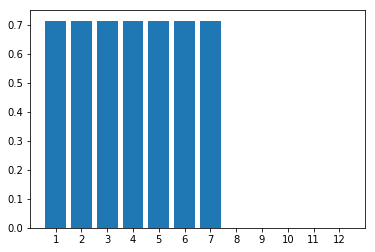

--------------------------------------------------
Benefit by period
    Period  Benefit
0        1      0.0
1        2      0.0
2        3      0.0
3        4      0.0
4        5      0.0
5        6      0.0
6        7      0.0
7        8    170.0
8        9      0.0
9       10      0.0
10      11      0.0
11      12      0.0


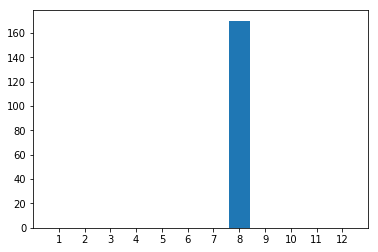

In [21]:
solution = {}
total_cost = 0.0
total_benefit = 0.0
projects_selected = 0
cost_by_period = {}
benefit_by_period = {}
selected_projects = []

for t in range(1, max(project_due_date.values())):
    cost_by_period[t] = 0.0
    benefit_by_period[t] = 0.0


for project in projects:
    if selection_var[project].x > 0.5:
        for t in range(project_earliest_start[project], project_latest_start[project]):
            if start_period_var[(project, t)].x > 0.5:
                selected_projects.append((project, t))
                for tt in range(t, t + project_duration[project]):
                    cost_by_period[tt] = cost_by_period[tt] + \
                                         float(project_cost[project]) / float(project_duration[project])

                benefit_by_period[t + project_duration[project]] = \
                    benefit_by_period[t + project_duration[project]] + project_benefit[project]
                break
        total_cost = total_cost + project_cost[project]
        total_benefit = total_benefit + project_benefit[project]
        projects_selected = projects_selected + 1

print('-'*50)
print(pd.DataFrame.from_records(selected_projects, columns=['Project ID', 'Period']))
print('-'*50)
solution['Projects Selected'] = projects_selected
solution['Project selection performance'] = float(projects_selected)/float(len(projects))
solution['Total cost'] = total_cost
solution['Total benefit']= total_benefit
solution['Benefit performance'] = total_benefit / float(sum([project_benefit[p] for p in projects]))
solution['Budget utilization']= total_cost / float(budget_recommended_projects)
solution['Cost performance'] = total_cost / float(sum([project_cost[p] for p in projects]))
solution['ROI'] = total_benefit / total_cost
solution['Available budget'] = budget_recommended_projects
solution['Extra budget required'] = artificial_budget.x

print(pd.DataFrame.from_records(list(solution.items()), columns=['KPI', 'Value']))

print('-'*50)
print('Cost by period')
print(pd.DataFrame.from_records(list(cost_by_period.items()), columns=['Period', 'Cost']))
plt.bar(range(len(cost_by_period)), list(cost_by_period.values()), align='center')
plt.xticks(range(len(cost_by_period)), list(cost_by_period.keys()))
plt.show()

print('-'*50)
print('Benefit by period')
print(pd.DataFrame.from_records(list(benefit_by_period.items()), columns=['Period', 'Benefit']))
plt.bar(range(len(benefit_by_period)), list(benefit_by_period.values()), align='center')
plt.xticks(range(len(benefit_by_period)), list(benefit_by_period.keys()))
plt.show()

